In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from load_data_and_distribution_analisys import split_dataset_v1, plot_confusion_matrix, load_dataset_cleaned

# Feature selection con Random Forest

In questa fase del progetto, proviamo ad ottimizzare la RandomForest facendo feature selection; avendo a che fare con un modello predittivo di questo tipo, ovvero abbastanza robusto alle feature irrilevanti, non ci aspettiamo un grosso miglioramento delle performance ma nonostante ciò è comunque un passaggio utile per poter eventualmente semplificare il modello andando a togliere anche poche feature e rendere il modello predittivo poco più veloce.
Inoltre, non verrà indicato a priori un numero fissato di feature da selezionare, in quanto non certi di quelle che possano essere le performance selezionando solo il 10%, il 20%, il 50%, il 75%... delle feature; quindi calcoliamo la f1_score (che per il caso multiclasse ci sembra essere la metrica migliore) ad ogni best_feature aggiunta e salviamo la combinazione di feature migliore tra tutte quelle testate.

In [11]:
dataset_cleaned = load_dataset_cleaned()

Path to dataset files: /Users/marcodeano/.cache/kagglehub/datasets/sooyoungher/smoking-drinking-dataset/versions/2
   sex  age  height  weight  ...  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN
0    1   35     170      75  ...      35.0       40.0               1.0       1
1    1   30     180      80  ...      36.0       27.0               3.0       0
2    1   40     165      75  ...      32.0       68.0               1.0       0
3    1   50     175      80  ...      34.0       18.0               1.0       0
4    1   50     165      60  ...      12.0       25.0               1.0       0

[5 rows x 24 columns]


In [12]:
X_smoke, Y_smoke, X_drink, Y_drink = split_dataset_v1(dataset_cleaned)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_smoke, Y_smoke, test_size=0.3, random_state=42, stratify=Y_smoke)
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_drink, Y_drink, test_size=0.3, random_state=42, stratify=Y_drink)

In [ ]:
X_train_s, X_val_s, y_train_s, y_val_s = train_test_split(X_smoke, Y_smoke, test_size=0.3, random_state=42)

selected_features_s = []
best_selected_features_s = []
remaining_features = [col for col in X_train_s.columns] 
best_overall_score = 0

while len(remaining_features) > 0:
    best_score = 0
    best_feature = None
    
    for feature in remaining_features:
        current_features = selected_features_s + [feature]
        forest = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=50, random_state=42, class_weight="balanced")
        forest.fit(X_train_s.loc[:, current_features], y_train_s)
        y_pred = forest.predict(X_val_s.loc[:, current_features])
        score = f1_score(y_val_s, y_pred, average="weighted")
        
        if score > best_score:
            best_score = score
            best_feature = feature

    selected_features_s.append(best_feature)
    remaining_features.remove(best_feature)
    print(f"Feature selezionata: {best_feature}, score: {best_score*100:.2f}%")

    if best_score > best_overall_score:
        best_overall_score = score
        best_selected_features_s = selected_features_s.copy()
            
print("Feature finali selezionate:", best_selected_features_s)

**NB:** i risultati della cella precedente sono stati copiati e riportati in questa cella di markdown perchè i tempi per ottenere i risultati erano molto lunghi e sono stati ottenuti in momenti diversi.

Feature selezionata: height, score: 61.46%  
Feature selezionata: sex, score: 66.84%  
Feature selezionata: age, score: 69.13%  
Feature selezionata: weight, score: 69.33%  
Feature selezionata: gamma_GTP, score: 69.35%  
Feature selezionata: HDL_chole, score: 69.77%  
Feature selezionata: SGOT_ALT, score: 70.01%  
Feature selezionata: hemoglobin, score: 70.16%  
Feature selezionata: SGOT_AST, score: 70.24%  
Feature selezionata: DBP, score: 70.30%  
Feature selezionata: LDL_chole, score: 70.32%  
Feature selezionata: serum_creatinine, score: 70.36%  
Feature selezionata: triglyceride, score: 70.40%  
Feature selezionata: BLDS, score: 70.42%  
Feature selezionata: sight_right, score: 70.41%  
Feature selezionata: hear_right, score: 70.43%  
Feature selezionata: urine_protein, score: 70.42%  
Feature selezionata: SBP, score: 70.40%  
Feature selezionata: waistline, score: 70.39%  
Feature selezionata: hear_left, score: 70.42%  
Feature selezionata: tot_chole, score: 70.38%  
Feature selezionata: urine_protein, score: 70.37%  
Feature selezionata: sight_left, score: 70.40%  
Feature selezionata: SBP, score: 70.35%  
Feature finali selezionate: ['age', 'sex', 'height', 'weight', 'hear_right', 'sight_right', 'DBP', 'BLDS', 'HDL_chole', 'LDL_chole', 'triglyceride', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'hemoglobin']

In [ ]:
X_train_d, X_val_d, y_train_d, y_val_d = train_test_split(X_drink, Y_drink, test_size=0.3, random_state=42)

selected_features_d = []
best_selected_features_d = []
remaining_features = [col for col in X_train_d.columns] 
best_overall_score = 0

while len(remaining_features) > 0:
    best_score = 0
    best_feature = None
    
    for feature in remaining_features:
        current_features = selected_features_d + [feature]
        forest = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=50, random_state=42)
        forest.fit(X_train_d.loc[:, current_features], y_train_d)
        y_pred = forest.predict(X_val_d.loc[:, current_features])
        score = accuracy_score(y_val_d, y_pred)
        
        if score > best_score:
            best_score = score
            best_feature = feature

    selected_features_d.append(best_feature)
    remaining_features.remove(best_feature)
    print(f"Feature selezionata: {best_feature}, score: {best_score*100:.2f}%")

    if best_score > best_overall_score:
        best_overall_score = score
        best_selected_features_d = selected_features_d.copy()
            
print("Feature finali selezionate:", best_selected_features_d)

**NB:** i risultati della cella precedente sono stati copiati e riportati in questa cella di markdown perchè i tempi per ottenere i risultati erano molto lunghi e sono stati ottenuti in momenti diversi.

Feature selezionata: sex, score: 68.30%  
Feature selezionata: age, score: 70.13%  
Feature selezionata: gamma_GTP, score: 71.26%   
Feature selezionata: HDL_chole, score: 71.61%  
Feature selezionata: SGOT_ALT, score: 72.25%  
Feature selezionata: weight, score: 72.53%  
Feature selezionata: SGOT_AST, score: 72.74%  
Feature selezionata: tot_chole, score: 72.90%  
Feature selezionata: triglyceride, score: 72.94%  
Feature selezionata: LDL_chole, score: 73.01%  
Feature selezionata: serum_creatinine, score: 72.99%  
Feature selezionata: DBP, score: 73.06%  
Feature selezionata: hemoglobin, score: 73.05%  
Feature selezionata: BLDS, score: 73.04%  
Feature selezionata: hear_right, score: 72.99%  
Feature selezionata: waistline, score: 73.06%  
Feature selezionata: hear_left, score: 73.03%  
Feature selezionata: height, score: 73.07%  
Feature selezionata: sight_left, score: 73.05%  
Feature selezionata: sight_right, score: 73.01%  
Feature selezionata: SBP, score: 72.97%  
Feature selezionata: urine_protein, score: 72.90%  
Feature finali selezionate: ['sex', 'age', 'gamma_GTP', 'HDL_chole', 'SGOT_ALT', 'weight', 'SGOT_AST', 'tot_chole', 'triglyceride', 'LDL_chole', 'serum_creatinine', 'DBP', 'hemoglobin', 'BLDS', 'hear_right', 'waistline', 'hear_left', 'height']

In [13]:
best_selected_features_d = ["sex", "age", "gamma_GTP", "HDL_chole", "SGOT_ALT", "weight", "SGOT_AST", "tot_chole", "triglyceride", "LDL_chole", "serum_creatinine", "DBP", "hemoglobin", "BLDS", "hear_right", "waistline", "hear_left", "height"]
best_selected_features_s = ["age", "sex", "height", "weight", "hear_right", "sight_right", "DBP", "BLDS", "HDL_chole", "LDL_chole", "triglyceride", "serum_creatinine", "SGOT_AST", "SGOT_ALT", "gamma_GTP", "hemoglobin"]

In [14]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_smoke, Y_smoke, test_size=0.3, random_state=42)
forest = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=50, random_state=42, class_weight="balanced")
forest.fit(X_train_s.loc[:, best_selected_features_s], y_train_s)
y_pred_rf_s = forest.predict(X_test_s.loc[:, best_selected_features_s])
report = classification_report(y_test_s, y_pred_rf_s, target_names=["Non fumatore", "Ex-fumatore", "Fumatore"])
print(report)

              precision    recall  f1-score   support

Non fumatore       0.94      0.73      0.82    179990
 Ex-fumatore       0.41      0.58      0.48     52103
    Fumatore       0.49      0.64      0.55     63429

    accuracy                           0.68    295522
   macro avg       0.61      0.65      0.62    295522
weighted avg       0.75      0.68      0.70    295522



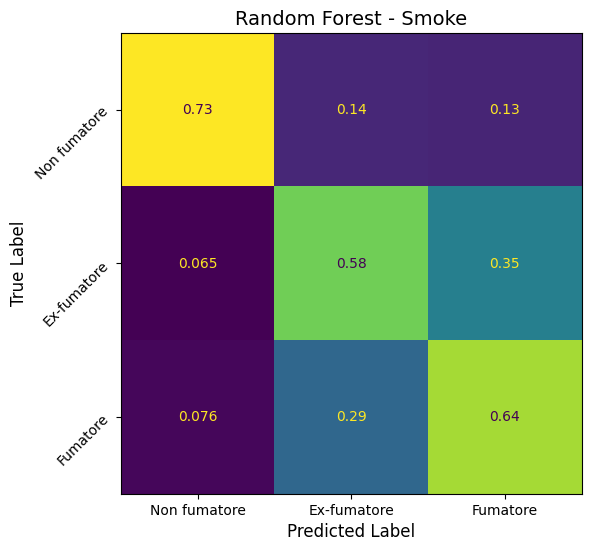

In [15]:
plot_confusion_matrix(y_test_s, y_pred_rf_s, ["Non fumatore", "Ex-fumatore", "Fumatore"], "Random Forest - Smoke")

In [16]:
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_drink, Y_drink, test_size=0.3, random_state=42)
forest = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=50, random_state=42)
forest.fit(X_train_d.loc[:, best_selected_features_d], y_train_d)
y_pred_rf_d = forest.predict(X_test_d.loc[:, best_selected_features_d])
report = classification_report(y_test_d, y_pred_rf_d, target_names=["Y", "N"])
print(report)

              precision    recall  f1-score   support

           Y       0.74      0.71      0.73    147869
           N       0.72      0.75      0.74    147653

    accuracy                           0.73    295522
   macro avg       0.73      0.73      0.73    295522
weighted avg       0.73      0.73      0.73    295522



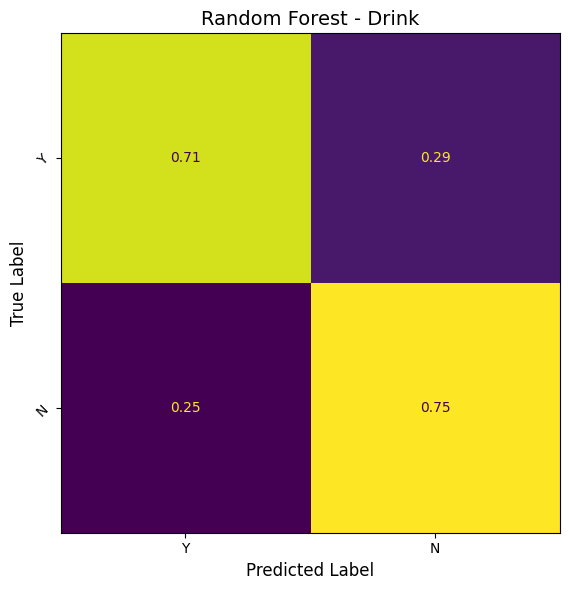

In [17]:
plot_confusion_matrix(y_test_d, y_pred_rf_d, ["Y", "N"], "Random Forest - Drink")